In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Import the dataset

df = pd.read_csv('AirPassengers.csv')

df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
# Verifying the data type

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [ ]:
# Parsing the 'Month' column into a yyyy-mm-dd format.

df['Month'] = df['Month'].apply(lambda x:pd.datetime.strptime(x,'%Y-%m'))

In [6]:
df['Month'].head()

0   1949-01-01
1   1949-02-01
2   1949-03-01
3   1949-04-01
4   1949-05-01
Name: Month, dtype: datetime64[ns]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


All 144 entries inplace and the data type of 'Month' column changed to datetime64.

In [17]:
# Verifying

df.head()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [30]:
# Setting the 'Month' column as the index

df.set_index('Month', inplace=True)

df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [32]:
df1 = df['#Passengers']

df1['1949-01-01']

112

In [33]:
# Import 'datetime' librabry

from datetime import datetime

In [34]:
df1[datetime(1949,1,1)]

112

In [35]:
# Checking on a specific range

df1['1949-01-01':'1949-05-01']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64

In [36]:
# All 1949 rows
df1['1949']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
1949-11-01    104
1949-12-01    118
Name: #Passengers, dtype: int64

__Checking for Stationarity__

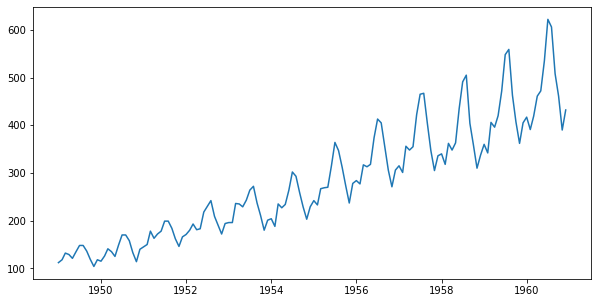

In [38]:
plt.figure(figsize=(10,5))
plt.plot(df1)

__Function for testing stationarity__

In [39]:
# Importing adfuller method

from statsmodels.tsa.stattools import adfuller

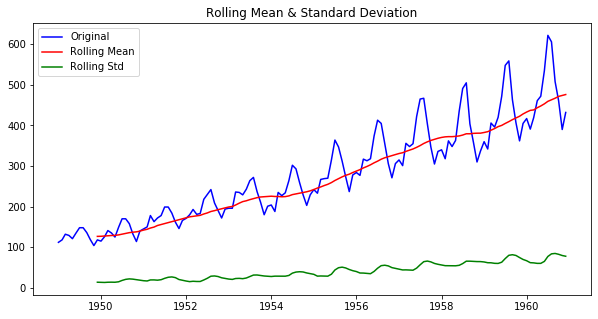



adfuller test output : 

Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [58]:
# Defining a function

def stationarity_test(timeseries):
    
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()
    
    # Visualize the rolling statistics
    plt.figure(figsize=(10,5))
    original = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='green', label='Rolling Std')
    plt.title('Rolling Mean & Standard Deviation')
    plt.legend()
    plt.show()
    
    # adfuller test
    print('\n\nadfuller test output : \n')
    adf_test = adfuller(timeseries, autolag='AIC')
    adf_output = pd.Series(adf_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in adf_test[4].items():
        adf_output['Critical Value (%s)'%key] = value
    print(adf_output)
    
stationarity_test(df1)

__Making the data stationary__

In [59]:
# Taking log

df1_log = np.log(df1)

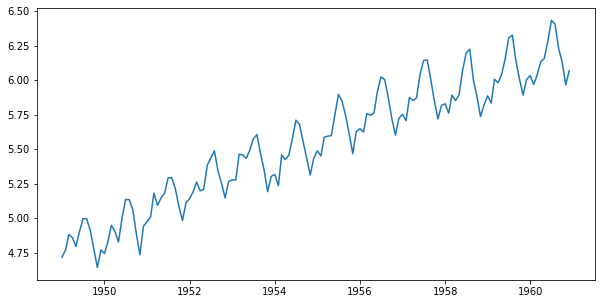

In [60]:
plt.figure(figsize=(10,5))
plt.plot(df1_log)

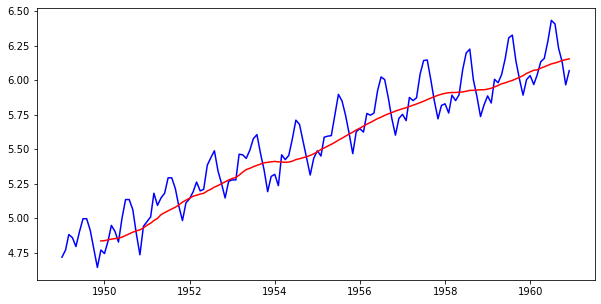

In [61]:
# Smoothing : Moving average

mov_avg = df1_log.rolling(window=12).mean()
plt.figure(figsize=(10,5))
plt.plot(df1_log, color='blue')
plt.plot(mov_avg, color='red')

In [62]:
# Finding the difference

diff = df1_log - mov_avg
diff.head()

Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
Name: #Passengers, dtype: float64

In [63]:
# Removing 'NaN' values

diff.dropna(inplace=True)
diff.head()

Month
1949-12-01   -0.065494
1950-01-01   -0.093449
1950-02-01   -0.007566
1950-03-01    0.099416
1950-04-01    0.052142
Name: #Passengers, dtype: float64

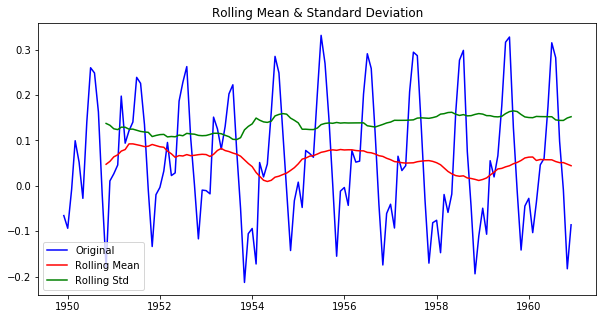



adfuller test output : 

Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


In [64]:
# Checking this in the 'stationarity_test' function

stationarity_test(diff)

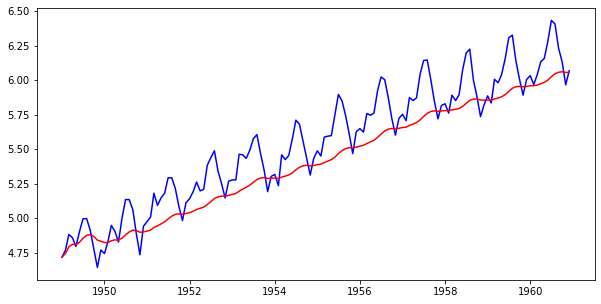

In [65]:
# Checking Exponential Moving average

exp_mov_avg = df1_log.ewm(halflife=12).mean()
plt.figure(figsize=(10,5))
plt.plot(df1_log, color='blue')
plt.plot(exp_mov_avg, color='red')

In [66]:
diff1 = df1_log - exp_mov_avg

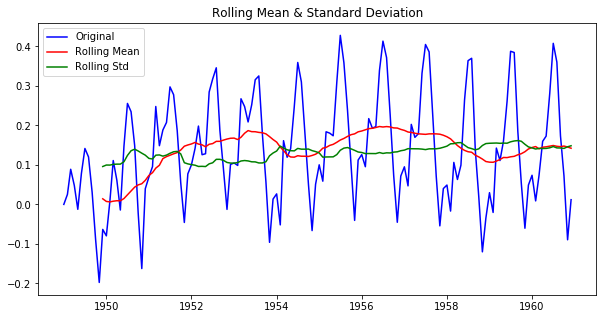



adfuller test output : 

Test Statistic                  -3.601262
p-value                          0.005737
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [67]:
# Checking in the function 'stationarity_test'

stationarity_test(diff1)

__Eliminate Trend and Seasonality__

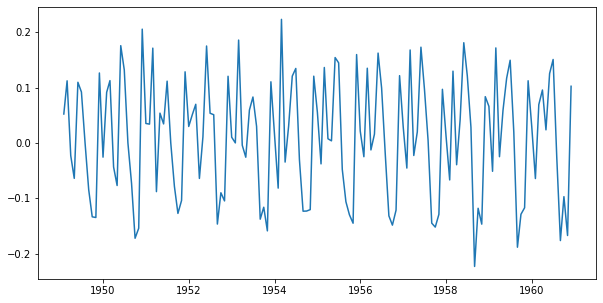

In [69]:
# Shifting values by 1 across rows

df1_log_diff = df1_log - df1_log.shift()
plt.figure(figsize=(10,5))
plt.plot(df1_log_diff)

In [71]:
df1_log_diff.isna().sum()

1

In [72]:
df1_log_diff.dropna(inplace=True)

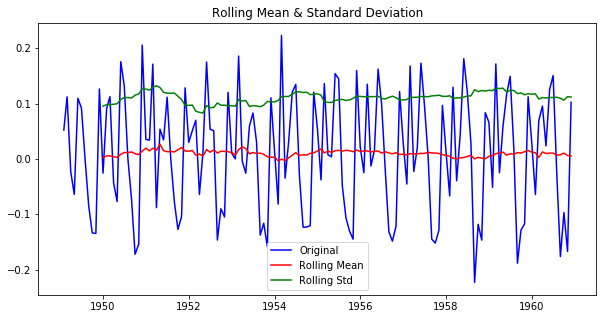



adfuller test output : 

Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


In [73]:
# Checking in the 'stationarity_test' function

stationarity_test(df1_log_diff)

__Decomposition__

In [74]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomp = seasonal_decompose(df1_log)

trend = decomp.trend
seasonal = decomp.seasonal
residual = decomp.resid

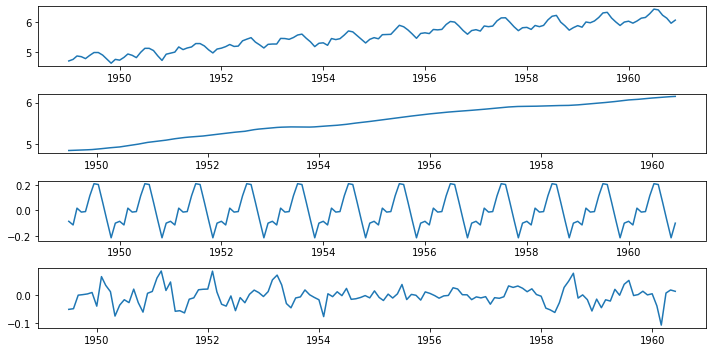

In [76]:
plt.figure(figsize=(10,5))
plt.subplot(4,1,1)
plt.plot(df1_log, label='Original')
plt.subplot(4,1,2)
plt.plot(trend, label='Trend')
plt.subplot(4,1,3)
plt.plot(seasonal, label='Seasonal')
plt.subplot(4,1,4)
plt.plot(residual, label='Residual')
plt.tight_layout()

In [77]:
df1_log_decomp = residual
df1_log_decomp.isna().sum()

12

In [78]:
df1_log_decomp.dropna(inplace=True)

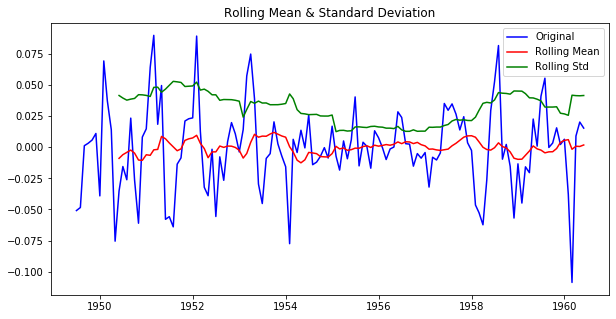



adfuller test output : 

Test Statistic                -6.332387e+00
p-value                        2.885059e-08
#Lags Used                     9.000000e+00
Number of Observations Used    1.220000e+02
Critical Value (1%)           -3.485122e+00
Critical Value (5%)           -2.885538e+00
Critical Value (10%)          -2.579569e+00
dtype: float64


In [79]:
# Check the adfuller stats in 'stationarity_test'

stationarity_test(df1_log_decomp)

__AutoCorrelational function & Partial Autocorrelational Function__

In [81]:
# Import acf & pacf

from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(df1_log_diff, nlags=20)
lag_pacf = pacf(df1_log_diff, nlags=20, method='ols')

C:\Users\comp\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


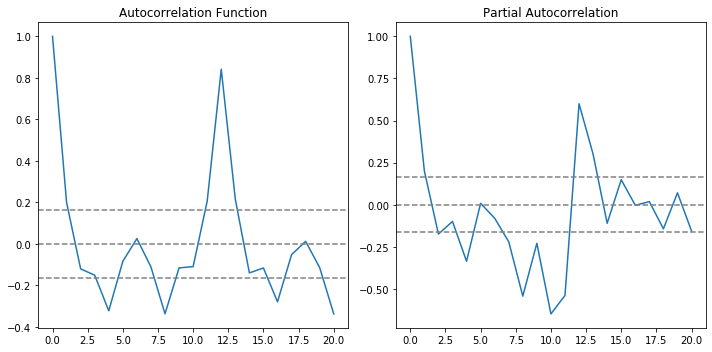

In [85]:
# plot acf & pacf

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='grey')
plt.axhline(y = -1.96/np.sqrt(len(df1_log_diff)), linestyle='--', color='grey')
plt.axhline(y = 1.96/np.sqrt(len(df1_log_diff)), linestyle='--', color='grey')
plt.title('Autocorrelation Function')


plt.subplot(1,2,2)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='grey')
plt.axhline(y = -1.96/np.sqrt(len(df1_log_diff)), linestyle='--', color='grey')
plt.axhline(y = 1.96/np.sqrt(len(df1_log_diff)), linestyle='--', color='grey')
plt.title('Partial Autocorrelation')
plt.tight_layout()

__ARIMA__

In [86]:
# Import ARIMA
from statsmodels.tsa.arima_model import ARIMA

C:\Users\comp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS: 1.5023')

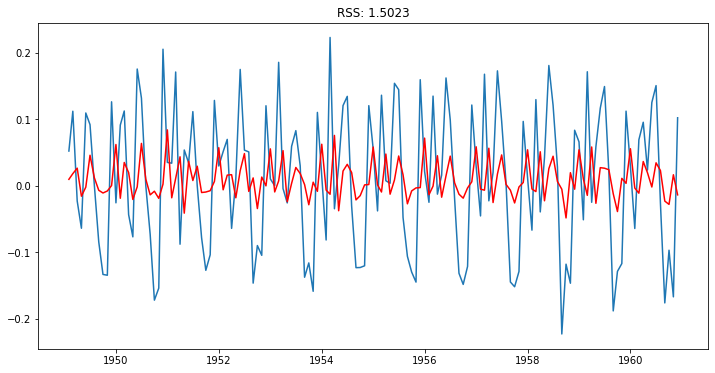

In [89]:
# AR model

model = ARIMA(df1_log, order=(2,1,0))
result_AR = model.fit(disp=-1)
plt.figure(figsize=(12,6))
plt.plot(df1_log_diff)
plt.plot(result_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((result_AR.fittedvalues-df1_log_diff)**2))

C:\Users\comp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS: 1.4721')

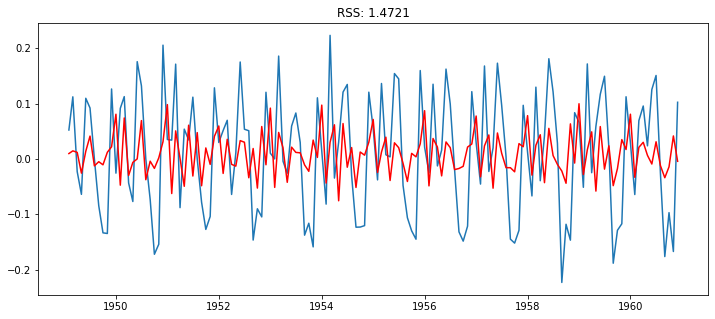

In [90]:
# MA model

model = ARIMA(df1_log, order=(0, 1, 2))  
result_MA = model.fit(disp=-1)  
plt.figure(figsize=(12,5))
plt.plot(df1_log_diff)
plt.plot(result_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((result_MA.fittedvalues-df1_log_diff)**2))

C:\Users\comp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS: 1.0292')

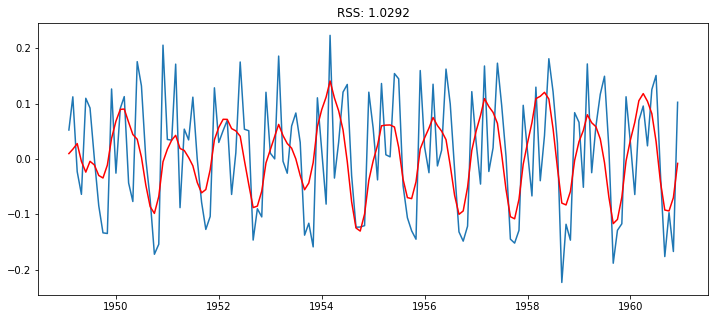

In [91]:
# ARIMA model

model = ARIMA(df1_log, order=(2, 1, 2))  
result_ARIMA = model.fit(disp=-1)  

plt.figure(figsize=(12,5))
plt.plot(df1_log_diff)
plt.plot(result_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((result_ARIMA.fittedvalues-df1_log_diff)**2))

__Bringing it back to the original numbers__

In [93]:
ARIMA_pred_diff = pd.Series(result_ARIMA.fittedvalues, copy=True)
ARIMA_pred_diff.head()

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023890
dtype: float64

In [94]:
ARIMA_pred_cs = ARIMA_pred_diff.cumsum()
ARIMA_pred_cs.head()

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64

In [95]:
ARIMA_pred_log = pd.Series(df1_log.iloc[0], index=df1_log.index)
ARIMA_pred_log = ARIMA_pred_log.add(ARIMA_pred_cs, fill_value=0)
ARIMA_pred_log.head()

Month
1949-01-01    4.718499
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773241
1949-05-01    4.768720
dtype: float64

In [96]:
df1_log.head()

Month
1949-01-01    4.718499
1949-02-01    4.770685
1949-03-01    4.882802
1949-04-01    4.859812
1949-05-01    4.795791
Name: #Passengers, dtype: float64

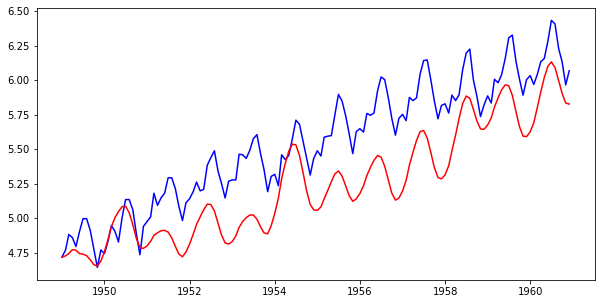

In [97]:
# Plot the df1_log & ARIMA_pred_log

plt.figure(figsize=(10,5))
plt.plot(df1_log, color='blue')
plt.plot(ARIMA_pred_log, color='red')

Text(0.5, 1.0, 'RMSE: 90.1045')

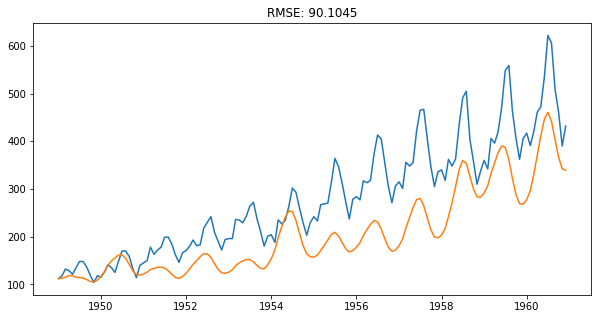

In [98]:
ARIMA_pred = np.exp(ARIMA_pred_log)

plt.figure(figsize=(10,5))
plt.plot(df1)
plt.plot(ARIMA_pred)
plt.title('RMSE: %.4f'% np.sqrt(sum((ARIMA_pred - df1)**2)/len(df1)))

In [99]:
# Verify both

df1.head()

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64

In [100]:
ARIMA_pred.head()

Month
1949-01-01    112.000000
1949-02-01    113.078122
1949-03-01    115.073415
1949-04-01    118.301989
1949-05-01    117.768367
dtype: float64

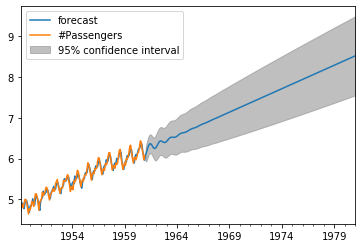

<Figure size 1440x720 with 0 Axes>

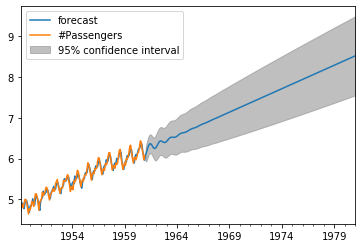

In [105]:
result_ARIMA.plot_predict(1,384)

In [107]:
x = result_ARIMA.forecast(steps=156)
x

(array([6.09553394, 6.15281403, 6.22442964, 6.29241096, 6.34164709,
        6.36359353, 6.35784678, 6.33139299, 6.29597538, 6.26447713,
        6.24738325, 6.2502517 , 6.27275832, 6.30940305, 6.35151484,
        6.38988645, 6.41727371, 6.43011046, 6.42906683, 6.41842485,
        6.40456153, 6.39403614, 6.3918308 , 6.40019498, 6.41833684,
        6.44295398, 6.46937425, 6.49293975, 6.51024109, 6.51989026,
        6.52267573, 6.52112383, 6.51864523, 6.51853685, 6.52311917,
        6.53322353, 6.54812861, 6.56591547, 6.58410298, 6.60036529,
        6.61313257, 6.62192773, 6.62737781, 6.63093122, 6.63438683,
        6.63937978, 6.64696497, 6.65739832, 6.67015315, 6.68414241,
        6.69806616, 6.71077891, 6.72157722, 6.73033975, 6.73749802,
        6.7438637 , 6.75037315, 6.75782584, 6.76668673, 6.77699813,
        6.78841309, 6.80032843, 6.81207184, 6.82308749, 6.83307126,
        6.84202482, 6.85022302, 6.85811211, 6.8661733 , 6.87479141,
        6.88416292, 6.89426373, 6.90487878, 6.91